## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [3]:
print('The dataset has {}'.format(df.shape[0]), 'rows')

The dataset has 294478 rows


c. The number of unique users in the dataset.

In [4]:
print('The number of unique users in the dataset is {}'.format(df.user_id.nunique()))

The number of unique users in the dataset is 290584


d. The proportion of users converted.

In [5]:
len(df.query('converted == 1')) / len(df)

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [6]:
# create a new dataframe to hold the mismatch between group and landing_page then finding its length
df_treatment_old = df.query('group == "treatment" and landing_page != "new_page"')
df_control_new = df.query('group == "control" and landing_page != "old_page"')
df_mismatch = df_treatment_old.append(df_control_new)
df_mismatch.shape[0]

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

**We don't seem to have any missing values in the dataset** 

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

**To assure the accuracy of the test, we need to remove the rows where `treatment` does not match the `new_page` and `control` does not match the `old_page`** 

In [8]:
# create an index for the df_mismatch to drop from the original dataframe, df
idx = df_mismatch.index

# remove df_mismatch from the original dataframe, df and save in df2
df2 = df.drop(idx, axis =0)

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
# find the number of unique users in the dataset
unique_users = df2.user_id.nunique()
unique_users

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
# double check if we have a non-unique users
df2.user_id.duplicated().sum()

1

In [12]:
# find the user id for the non-unique user
df2[df2.user_id.duplicated()].user_id

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [13]:
# query the rows for user_id = 773192
df2.query('user_id == 773192')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
# removing the row at 1899
df2 = df2.drop(1899, axis = 0)

In [15]:
# Make sure that duplicated user_id was removed
df2.user_id.duplicated().sum()

0

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
converted = df2.converted.mean()
converted

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
control_converted = (df.query('group == "control"').converted.mean())
control_converted

0.12039917935897611

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
treatment_converted = df.query('group == "treatment"').converted.mean()
treatment_converted

0.11891957956489856

d. What is the probability that an individual received the new page?

In [19]:
new_page_prop = len(df2.query('landing_page == "new_page"')) / len(df2)
new_page_prop

0.5000619442226688

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

**By Looking at our calculations above, we see that the conversion probability of the `treatment` group is `0.1189` while the conversion probability of the `control` is `0.1204`. Intuitively, we can say that the treatment group does not lead to more conversion. However, we cannot say that the control group leads to more conversion either, despite the fact that its conversion probability is slightly higher. Therefore, we need to test for significant statistical difference of the mean conversion for both groups to come up with a final decision.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$H_0: P_{new} - P_{old} \leq 0$$
$$H_1: P_{new} - P_{old} > 0$$


`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [22]:
n_new = df2.query('landing_page == "new_page"').shape[0]
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [23]:
n_old = df2.query('landing_page == "old_page"').shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice(df2.converted, n_new, p_new)

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted = np.random.choice(df2.converted, n_old, p_old)

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
# find the mean conversion of the new pages, old pages, and the difference, all under the null
p_new = new_page_converted.mean()
p_old = old_page_converted.mean()
p_new - p_old

-0.0012135646262672328

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [27]:
# find the difference of the mean conversion between the new pages and old_pages for 10000 simulated samples from the null
samples_new = np.random.binomial(n_new, p_new, 10000) / n_new
samples_old = np.random.binomial(n_new, p_new, 10000) / n_old
p_diffs = samples_new - samples_old

In [28]:
# calculate the observed statistics from our original sample
obs_stat = treatment_converted - control_converted
obs_stat

-0.0014795997940775518

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

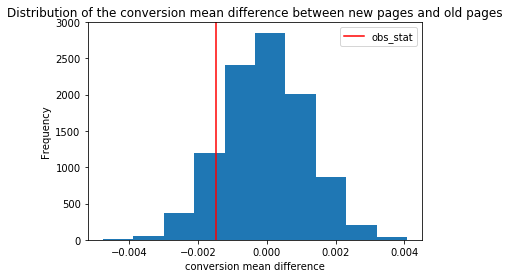

In [29]:
plt.hist(p_diffs)
plt.title('Distribution of the conversion mean difference between new pages and old pages')
plt.xlabel('conversion mean difference')
plt.ylabel('Frequency')
plt.axvline(x = obs_stat, color ='r', label ='obs_stat')
plt.legend();

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
# find the p_value of our obs_stat
print('p_value = {}'.format((p_diffs > obs_stat).mean()))

p_value = 0.8841


k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**What we did in the cell above is calculating the `p_value`, i.e, _the probability of obtaining the observed statistics or one more extreme in favor of the alternative hypothesis when the null hypothesis is true_. Since the `p_value` of ~ `0.89` is larger than `type I error`, `alpha` of `.05`, that is our sample is from the same distribution of the null hypothesis, we `fail to reject the _null hypothesis` , and we say that we don't have sufficient evidence to conclude that the new page leads to more conversion rate.** 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
# import neccessary libraries
from scipy import stats as st
import statsmodels.api as sm

In [32]:
# calculate z-statistics and p_value using statsmodels built-in
convert_old = len(df2.query('landing_page == "old_page" and converted == 1'))
convert_new = len(df2.query('landing_page == "new_page" and converted == 1'))
n_old = len(df2.query('landing_page == "old_page"'))
n_new = len(df2.query('landing_page == "new_page"'))

convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_stat, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], 0, 'larger')
z_stat, p_value

(-1.3109241984234394, 0.9050583127590245)

In [34]:
# calculate the lower and upper of z_criticial values at alpha = 0.05
z_critical = st.norm.ppf(.975)

lower, upper, = -z_critical, z_critical
lower, upper

(-1.959963984540054, 1.959963984540054)

In [35]:
# calculate the z-score for p_diffs to plot the distribution
p_diffs_z = st.zscore(p_diffs)

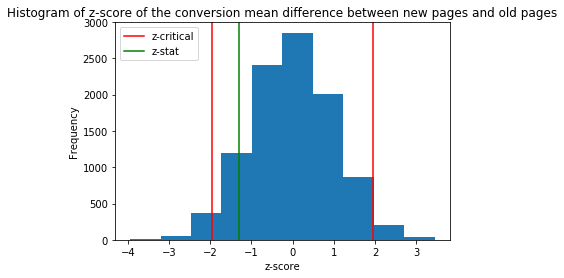

In [36]:
# plot the distribution of z-score for the p_diffs with z-critical values, and z-stat
plt.hist(p_diffs_z)
plt.title('Histogram of z-score of the conversion mean difference between new pages and old pages')
plt.xlabel('z-score')
plt.ylabel('Frequency')
plt.axvline(x = z_critical, color = 'r', label = 'z-critical')
plt.axvline(x = -z_critical, color ='r')
plt.axvline(x = z_stat, color = 'g', label = 'z-stat')
plt.legend();

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**By using `statsmodels` built-in, our `p_value` is `0.9050` which is close enough to the `p_value` of ~ `0.89` we calculated using bootstrapping method. Furthermore, the built-in  provides `z-stat` of `-1.3109` for our observed difference as shown in the graph with green line. Since we are using z-distribution, then at confidence level of 95%, our z-critical values (the confidence interval)  is between (-1.96 and 1.96) as shown in the graph with the red lines.<br>**

**Since the `z-stat` lies between `z-critical values`, we conclude that the distribution of our sample came from the same distribution of the null hypothesis, so we fail to reject the null hypothesis. <br>**

**Therefore, in each calculation method, the results are the same where we `fail to reject the null hypothesis` and conclude that that the new page does not lead to more conversion rate.**


<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Since our dependent variable is categorical then we should use logistic Regression.**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
# create an intercept column
df2['intercept'] = 1

# create a dummpy variable for the type of the page whether new or old, 1 for new, and 0 for old
df2[['ab_page', 'remove']] = pd.get_dummies(df2['landing_page'])

In [38]:
# double check if the values were correctly assigned to the dummy variable by checking new_page against 1, should be True
((df2['landing_page'] == 'new_page') == (df2['ab_page'] == 1)).all()

True

In [39]:
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,remove
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1


**Now we can remove the `remove` variable as we do not need it**

In [40]:
df2.drop('remove', axis = 1, inplace = True)
df2.head(1)

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [41]:
# create logistic regression model with one independent variable 'ab_page'
log_model = sm.Logit(df2.converted, df2[['intercept', 'ab_page']])
results = log_model.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [42]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:               8.077e-06
Time:                        09:42:37   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br> 

**The `p_value` associated with `ab_page` variable is `0.190`. The reason it is different from the `p_value` we obtained from part II, is that each hypotheses has a different objective. In the first hypothesis, we are testing whether the the conversion rate of the new page is larger than the conversion rate of the old page. However, through regression, we are testing whether the type of the page (new or old) will have an impact on predicting whether a user will convert or not.**

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Based on the data in hand, we have only the timestamp variable, which can be considerd. From the timestamp, we can extract the day and time where the user visited the website. However, although, the date may not have an effect on the conversion rate, I think the time has. For instance, a user who checks the website early morning might be more serious to enroll, in the contrary to a user who checks the website at night where he might be just browsing! Other variables that might be helpful are the country of the user. For example, users in countries where English is not their mother language may be hesitant to convert, or unable to understand the content of the page. Moreover, countries with low income per capita may not be able to pay for content (if requires payment) and prefer free contents. Now, that is being said, adding too many variables may not be helpful, rather weakening our model.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns. Provide the statistical output as well as a written response to answer this question.

In [44]:
# read in countries.csv file
country = pd.read_csv('countries.csv')
country.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [45]:
# Does country has the same row numbers as df2?
len(country) == len(df2)

True

In [46]:
# check for missing values
country.isnull().sum()

user_id    0
country    0
dtype: int64

In [47]:
# check the number of each country in the dataset
country.country.value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [48]:
# merging both dataframes and save in df3
df3 = df2.merge(country, on = 'user_id')
df3. head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [49]:
# creating dummy variables for country
df3[['CA', 'UK', 'US']] = pd.get_dummies(df3.country)
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [50]:
# fit a logistic model using ab_page and country as our independent variables, with US as the baseline
log_model_2 = sm.Logit(df3.converted, df3[['intercept', 'ab_page', 'CA', 'UK']])
results_2 = log_model_2.fit()
results_2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:               2.323e-05
Time:                        09:44:52   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

**Since the `p_value` of all the coefficients is larger than `alpha`, then we conclude that country has also no impact on predicting whether a user will convert or not.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [51]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1


In [52]:
# create new columns of the interaction between page and country, US is still the baseline
df3['CA_page'] = df3.CA * df3.ab_page 
df3['UK_page'] = df3.UK * df3.ab_page

In [53]:
df3.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country,CA,UK,US,CA_page,UK_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US,0,0,1,0,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US,0,0,1,0,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0


In [54]:
# create a model with all variables, US, and US_page are baselines
log_model_3 = sm.Logit(df3.converted, df3[['intercept', 'ab_page', 'CA', 'UK', 'CA_page', 'UK_page']])
results_3 = log_model_3.fit()
results_3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Thu, 13 Jun 2019   Pseudo R-squ.:               3.482e-05
Time:                        09:44:58   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
CA_page       -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK_page        0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

**Now even after adding the variables of the interaction between `county` and `ab_page` the model is still lacking significance. Therefore, the independent variables we have in hand fail to predict whether a user will convert or not.**